In [103]:
import numpy as np
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

In [118]:
def array_equals(a, b):
    if len(a) != len(b):
        return False
    return all(a[i] == b[i] for i in range(len(a)))

def match(seq, candidate):
    '''Return number of periods for candidate or 0'''
    for i in range(len(candidate)):
        sub = candidate[i:]
        # print(sub, seq[:len(sub)])
        if array_equals(seq[:len(sub)], sub):
            # print('match')
            # found a match for the first period
            num_complete_periods = (len(seq)-len(sub)) // len(candidate)
            final_period_length = (len(seq) - len(sub)) % len(candidate)
            pos = len(sub)
            for j in range(num_complete_periods):
                # print(seq[pos:pos+len(candidate)])
                if not array_equals(seq[pos:pos+len(candidate)], candidate):
                    return 0
                pos += len(candidate)
            if not array_equals(seq[pos:pos+final_period_length], candidate[:final_period_length]):
                return 0
            return num_complete_periods + (len(sub) + final_period_length)/len(candidate)
    return 0

def periodicity(seq):
    if len(seq) == 0:
        return 0, 0
    r = []
    for i in range(len(seq)-1, -1, -1):
        np = match(seq, seq[i:])
        r.append((len(seq[i:]), np, seq[i:]))
    # print(r)
    best = max(r, key=lambda t: t[1])
    period_number = best[0]
    period_length = best[1]
    return period_number, period_length

In [105]:
match('fasdf', 'asdf')

1.25

In [107]:
match('dfasdf', 'dfasdf')

1.0

In [108]:
periodicity('dfasdf')

(4, 1.5)

In [109]:
periodicity('101011001110')

(10, 1.2)

In [119]:
p = [np.mean([periodicity(np.random.randint(2, size=s))[1] for i in range(10)]) for s in range(100)]

Text(0,0.5,'Periodicity (# of periods found)')

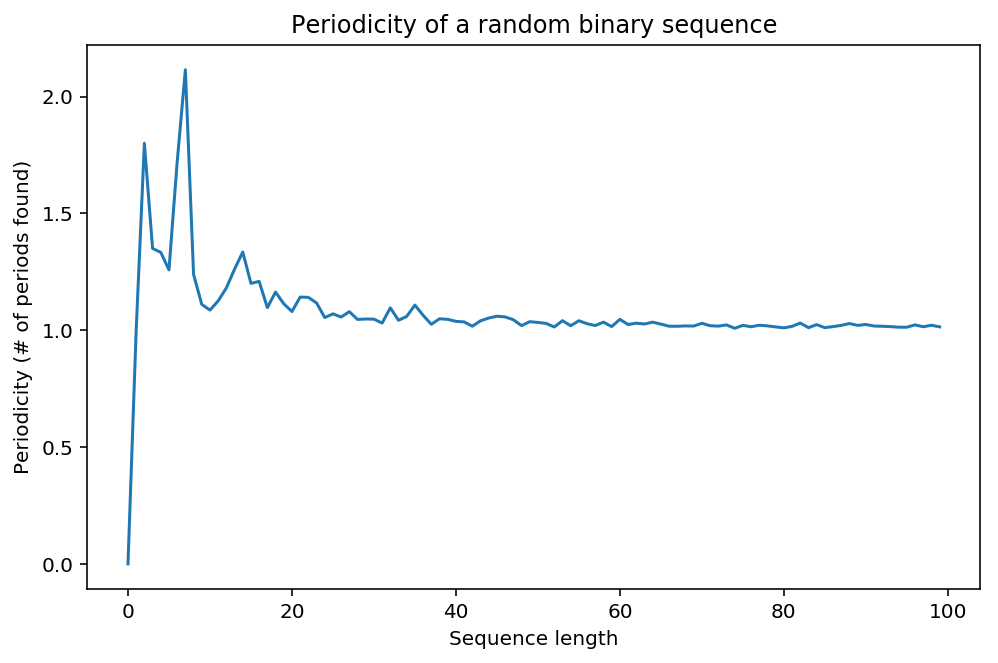

In [125]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes()
ax.plot(p)
ax.set_title('Periodicity of random binary sequences')
ax.set_xlabel('Sequence lengths')
ax.set_ylabel('Mean periodicity (# of periods found)')

Text(0,0.5,'Periodicity (# of periods found)')

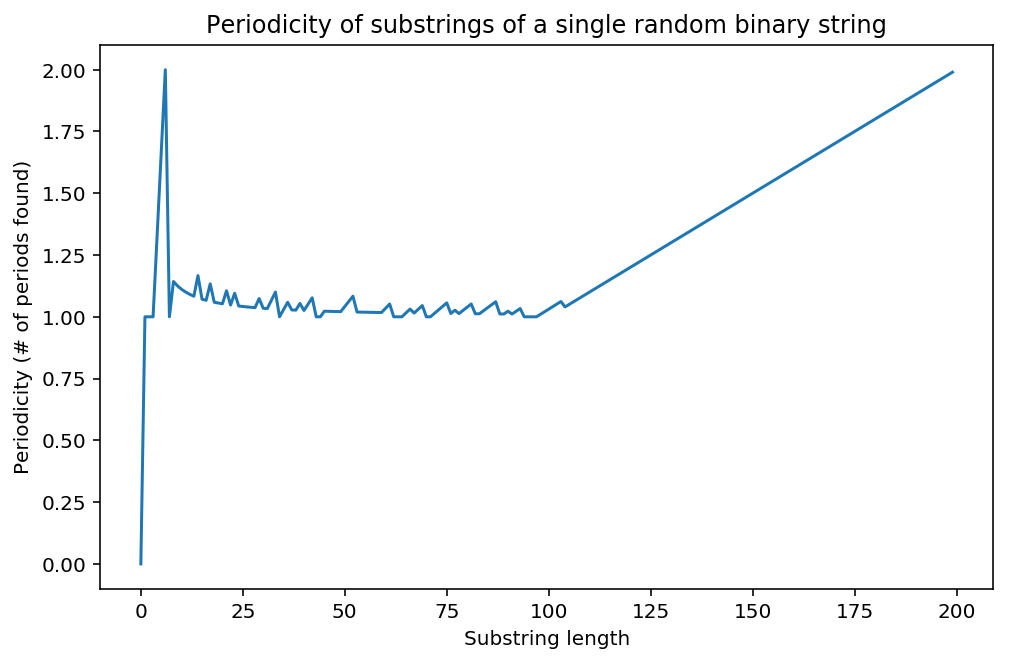

In [131]:
seq = list(np.random.randint(2, size=100))*2
ps = [periodicity(seq[:i])[1] for i in range(len(seq))]
fig = plt.figure(figsize=(8,5))
ax = plt.axes()
ax.plot(ps)
ax.set_title('Periodicity of substrings of a single random binary string')
ax.set_xlabel('Substring length')
ax.set_ylabel('Periodicity (# of periods found)')

In [134]:
periodicity(np.random.randint(2, size=1000))

(998, 1.002004008016032)